In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('./datasets/col_mat_nuw_output.csv')

# Display the first 100 rows of the DataFrame
print(data.head(100))

    0.00019698343957810148  Colombo Proper  2019-01-01  2019-01-02
0                 0.000263  Colombo Proper  2019-01-02  2019-01-03
1                 0.000099  Colombo Proper  2019-01-03  2019-01-04
2                 0.000210  Colombo Proper  2019-01-04  2019-01-05
3                 0.000179  Colombo Proper  2019-01-05  2019-01-06
4                 0.000108  Colombo Proper  2019-01-06  2019-01-07
..                     ...             ...         ...         ...
95                0.000180  Colombo Proper  2019-04-07  2019-04-08
96                0.000194  Colombo Proper  2019-04-08  2019-04-09
97                0.000201  Colombo Proper  2019-04-09  2019-04-10
98                0.000205  Colombo Proper  2019-04-10  2019-04-11
99                0.000279  Colombo Proper  2019-04-11  2019-04-12

[100 rows x 4 columns]


In [5]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
data.rename(columns=dict(zip(data.columns, column_names)), inplace=True)

# Display the first few rows after renaming
print(data.head())

   HCHO Reading        Location Current Date   Next Date
0      0.000263  Colombo Proper   2019-01-02  2019-01-03
1      0.000099  Colombo Proper   2019-01-03  2019-01-04
2      0.000210  Colombo Proper   2019-01-04  2019-01-05
3      0.000179  Colombo Proper   2019-01-05  2019-01-06
4      0.000108  Colombo Proper   2019-01-06  2019-01-07


In [6]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  3058 non-null   float64
 1   Location      5477 non-null   object 
 2   Current Date  5477 non-null   object 
 3   Next Date     5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [7]:
# Calculate the number of unique values in each column
for column in data.columns:
    unique_values_count = data[column].nunique()
    print(f"{column} has {unique_values_count} unique values.")

HCHO Reading has 3058 unique values.
Location has 3 unique values.
Current Date has 1826 unique values.
Next Date has 1826 unique values.


In [8]:
data.nunique()

HCHO Reading    3058
Location           3
Current Date    1826
Next Date       1826
dtype: int64

In [9]:
# Print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

HCHO Reading unique values:
[2.62552217e-04 9.85211890e-05 2.09932052e-04 ... 1.07861038e-04
 5.93039927e-06 2.36988212e-04]


Location unique values:
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']


Current Date unique values:
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2019-01-01']


Next Date unique values:
['2019-01-03' '2019-01-04' '2019-01-05' ... '2023-12-31' '2024-01-01'
 '2019-01-02']


In [10]:
# Check for null values in the DataFrame
null_counts = data.isnull().sum()

# Display the counts of null values for each column
print("Null value counts for each column:")
print(null_counts)


Null value counts for each column:
HCHO Reading    2419
Location           0
Current Date       0
Next Date          0
dtype: int64


In [11]:
# Impute null values with the mean of the column
mean_hcho_reading = data['HCHO Reading'].mean()
data['HCHO Reading'].fillna(mean_hcho_reading, inplace=True)

In [12]:
# Drop rows with null values in the 'HCHO Reading' column
data.dropna(subset=['HCHO Reading'], inplace=True)


In [13]:
# Check for null values in the DataFrame after handling missing values
null_counts = data.isnull().sum()
print("Null value counts for each column after handling missing values:")
print(null_counts)


Null value counts for each column after handling missing values:
HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  5477 non-null   float64
 1   Location      5477 non-null   object 
 2   Current Date  5477 non-null   object 
 3   Next Date     5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [15]:
# Remove duplicate rows from the DataFrame
data.drop_duplicates(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  5477 non-null   float64
 1   Location      5477 non-null   object 
 2   Current Date  5477 non-null   object 
 3   Next Date     5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 213.9+ KB


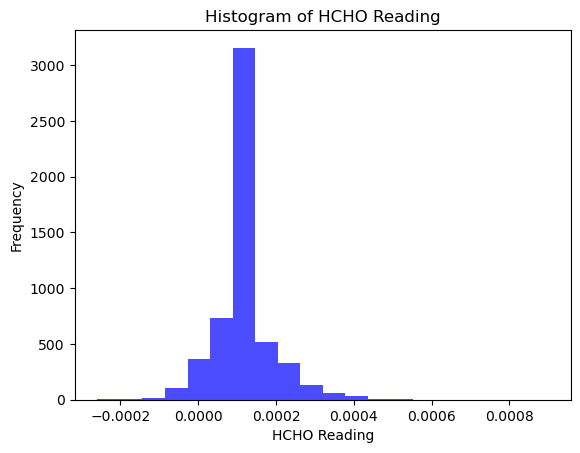

In [17]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.show()

In [18]:
# Convert data types
data['HCHO Reading'] = data['HCHO Reading'].astype(float)
data['Current Date'] = pd.to_datetime(data['Current Date'])
data['Next Date'] = pd.to_datetime(data['Next Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  5477 non-null   float64       
 1   Location      5477 non-null   object        
 2   Current Date  5477 non-null   datetime64[ns]
 3   Next Date     5477 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 213.9+ KB
